In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)



In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.sample(5)

,v1,v2
4174,ham,How are you doing. How's the queen. Are you go...
5516,ham,"Ya, i'm referin to mei's ex wat... No ah, wait..."
2575,ham,Now thats going to ruin your thesis!
1876,ham,Watching tv now. I got new job :)
2633,ham,That's what I love to hear :V see you sundayis...


In [ ]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.sample(5)

,target,text
1027,ham,Are you not around or just still asleep? :V
1854,ham,They did't play one day last year know even th...
2406,ham,One of best dialogue in cute reltnship..!! \We...
3877,ham,What you need. You have a person to give na.
4939,ham,ÌÏ go home liao? Ask dad to pick me up at 6...


In [ ]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Correctly encode the target column
df['target'] = encoder.fit_transform(df['target'])

# Display the first few rows
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# df['target']=encoder.fit(df['target'])

In [ ]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

**Exploratory data analysis**

In [ ]:
df["target"].value_counts()

,count
target,
0,4516
1,653


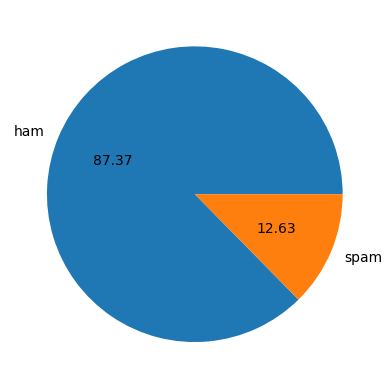

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt')  # Download tokenizer data


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = df.copy()  # Breaks any links to the original DataFrame
df["numer_of_char"] = df["text"].apply(len)


In [ ]:
df

,target,text,numer_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
 import nltk
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df["num_words"]=df["text"].apply(lambda x:len((nltk.word_tokenize(x))))

In [ ]:
df

,target,text,numer_of_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [ ]:
df["num_sent"]=df["text"].apply(lambda x:len((nltk.sent_tokenize(x))))

In [ ]:
df.head()

,target,text,numer_of_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[["target",	"text",	"numer_of_char",	"num_words",	"num_sent"]].describe()

,target,numer_of_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
df[df["target"]==0][["numer_of_char","num_words","num_sent"]].describe()

,numer_of_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["target"]==1][["numer_of_char","num_words","num_sent"]].describe()

,numer_of_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='numer_of_char', ylabel='Count'>

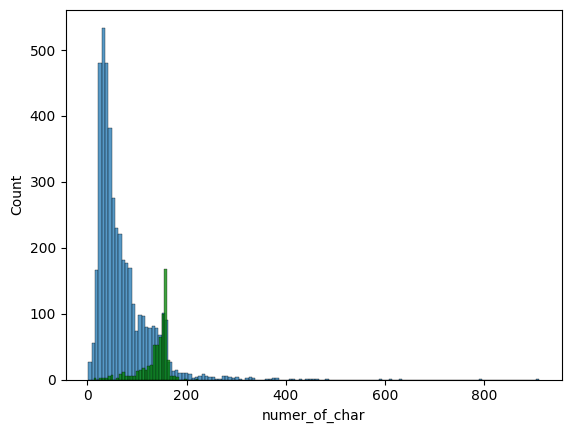

In [ ]:
sns.histplot(df[df["target"]==0]["numer_of_char"])#spam msgs
sns.histplot(df[df["target"]==1]["numer_of_char"],color="green")#ham msgs

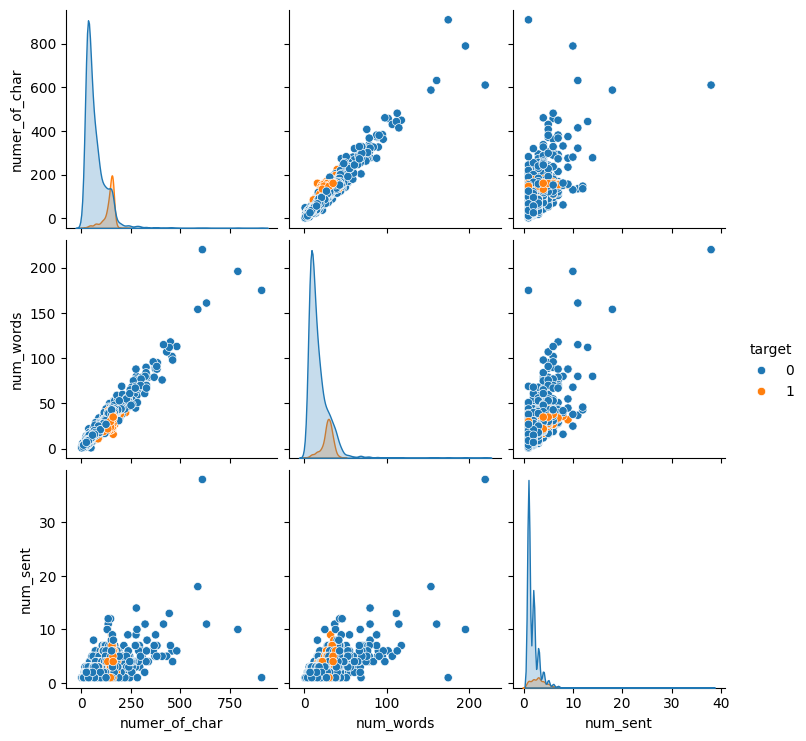

In [ ]:
sns.pairplot(df,hue="target")

<Axes: >

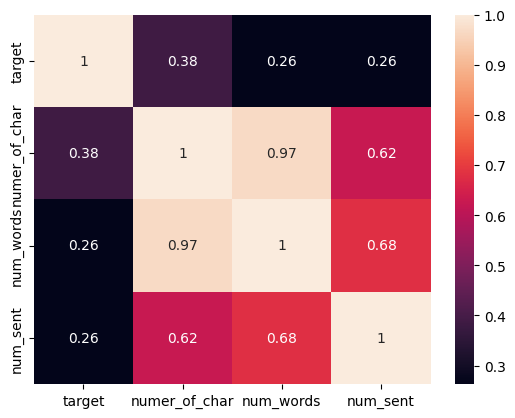

In [ ]:
sns.heatmap(df[["target",	"numer_of_char",	"num_words",	"num_sent"]].corr(),annot=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()  # Initialize the Porter Stemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def transform_text(text):
  text= text.lower()
  text=nltk.word_tokenize(text)


  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()


  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  return y

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [ ]:
df["trasformed_text"]=df["text"].apply(transform_text)

In [ ]:
df.head()

,target,text,numer_of_char,num_words,num_sent,trasformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf, lives, around, though]"


In [ ]:
df["trasformed_text"] = df["trasformed_text"].astype(str)


In [ ]:
df.head()

,target,text,numer_of_char,num_words,num_sent,trasformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazy', 'available'..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'early', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goes', 'usf', 'lives', 'arou..."


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")


In [ ]:
spam_wc=wc.generate(df[df["target"]==1]["trasformed_text"].str.cat(sep=" "))

In [ ]:
print(df.dtypes)

target              int64
text               object
numer_of_char       int64
num_words           int64
num_sent            int64
trasformed_text    object
dtype: object


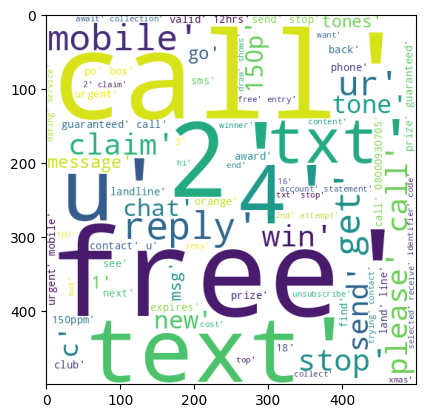

In [ ]:
plt.imshow(spam_wc)

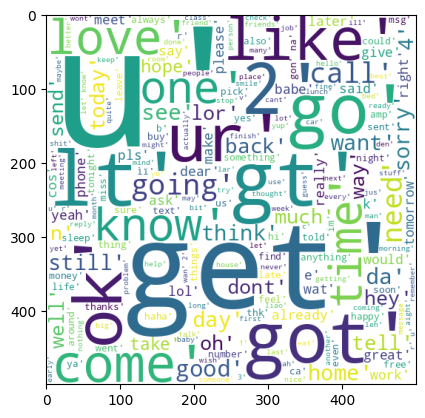

In [ ]:
ham_wc=wc.generate(df[df["target"]==0]["trasformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df["target"]==1]["trasformed_text"].tolist():
  print(msg)
  for word in msg:
    spam_corpus.append(word)

['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18']
['freemsg', 'hey', 'darling', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hours']
['mobile', '11', 'months', 'u', 'r', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'mobile', 'update', 'co', 'free', '08002986030']
['six', 'chances', 'win', 'cash', '100', 'pounds', 'txt', 'csh11', 'send', 'cost', '6days', 'tsandcs', 'apply', 'reply', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 

In [ ]:
len(spam_corpus)

90629

In [ ]:
from collections import Counter  # Importing Counter


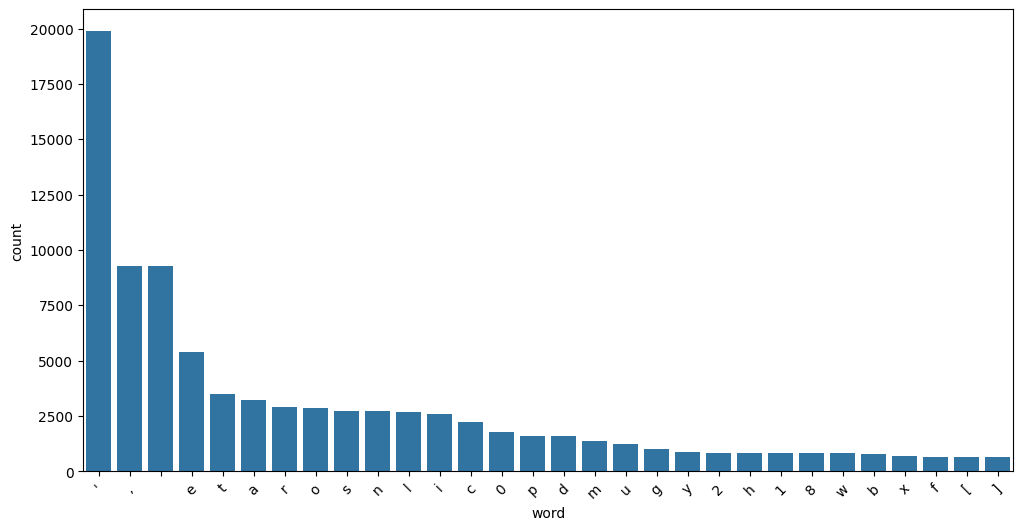

In [ ]:
spam_word_counts = Counter(spam_corpus).most_common(30)

df_spam_words = pd.DataFrame(spam_word_counts, columns=["word", "count"])

plt.figure(figsize=(12,6))
sns.barplot(x="word", y="count", data=df_spam_words)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df["target"]==0]["trasformed_text"].tolist():
  print(msg)
  for word in msg:
    ham_corpus.append(word)

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']
['per', 'request', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', '9', 'copy', 'friends', 'callertune']
['gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight', 'k', 'cried', 'enough', 'today']
['searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'granted', 'fulfil', 'promise', 'wonderful', 'blessing', 'times']
['date', 'sunday']
['oh', 'k', 'watching']
['eh', 'u', 'remember', '2', 'spell', 'name', 'yes', 'v', 'naughty', 'make', 'v', 'wet']
['fine', 'thatåõs', 'way', 'u', 'feel', 'thatåõs', 'way', 'gota', 'b']
['serio

In [ ]:
len(ham_corpus)

302273

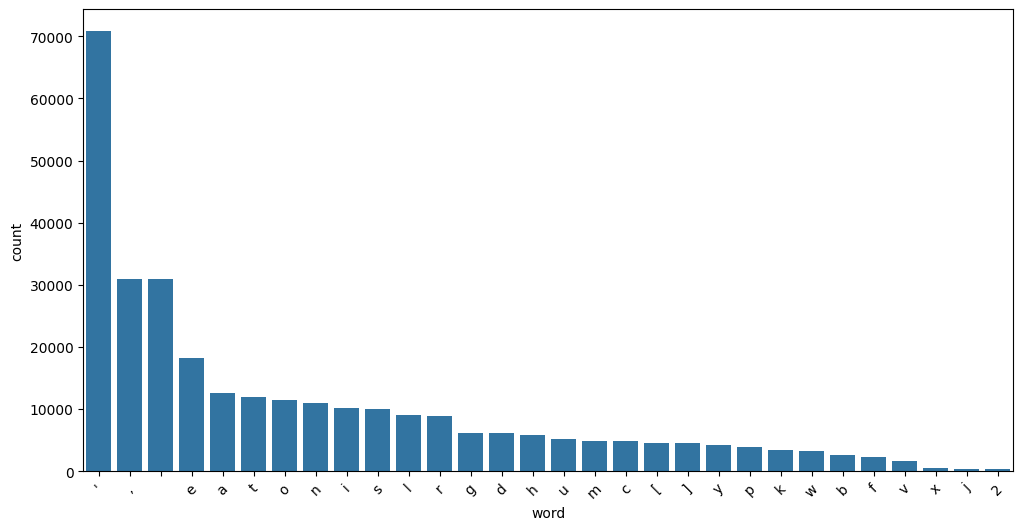

In [ ]:
ham_word_counts = Counter(ham_corpus).most_common(30)

df_ham_words = pd.DataFrame(ham_word_counts, columns=["word", "count"])

plt.figure(figsize=(12,6))
sns.barplot(x="word", y="count", data=df_ham_words)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

**Model Buliding**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [ ]:
print(type(df["trasformed_text"].iloc[0]))  # Check the data type of the first row


<class 'str'>


In [ ]:
import ast

df["trasformed_text"] = df["trasformed_text"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [ ]:
df["trasformed_text"] = df["trasformed_text"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))


In [ ]:
print(type(df["trasformed_text"].iloc[0]))  # Should now be <class 'str'>
print(df["trasformed_text"].head())  # Should print proper sentences, not lists


<class 'str'>
0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4               nah think goes usf lives around though
Name: trasformed_text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(df["trasformed_text"]).toarray()
print(x.shape)  # Check dimensions


(5169, 8002)


In [ ]:
y=df["target"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Ensure X_train and y_train are NumPy arrays
print(type(X_train), type(y_train))  # Should both be <class 'numpy.ndarray'>

# Train model
gnb.fit(X_train, y_train)

# Predictions
y_pred1 = gnb.predict(X_test)

# Evaluate



<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.9013539651837524
[[811  85]
 [ 17 121]]
0.587378640776699


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9013539651837524
[[811  85]
 [ 17 121]]
0.587378640776699


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9013539651837524
[[811  85]
 [ 17 121]]
0.587378640776699
